### Importing the Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Defining Threshold Function

In [2]:
def threshold_function(output, threshold=1):
  if output>=threshold:
    return 1
  else:
    return 0

### Defining Perceptron

In [8]:
def Perceptron(input, weight, target, bias=0):
  output=0
  for i in range(len(input)):
    output+=input[i]*weight[i]
  output=threshold_function(output+bias)
  print(f"Got:{output},Expected:{target}")
  return (output==target, output)

### Defining the Operation for the Perceptron

In [19]:
def perform_Operation(weight, bias, inputs, targets, threshold = 1, learning_rate = 0.5, epochs = 10):
  print("*************************************-----------------------------------------------------------------*************************************")
  for epoch in range(epochs):
    print(f"\n\nFor Epoch {epoch + 1}")

    i = 0
    did_break = False
    for i in range(len(inputs)):
      result = Perceptron(weight, inputs[i], targets[i], bias)
      if not result[0]:
        # Calculate new weights
        for j in range(len(weight)):
          print(f"Calculating New weights, where learning_rate: {learning_rate}, old_weights: {weight[j]}, difference: {(targets_AND[i] - result[1])}, got_output: {targets_AND[i]}, expected_output: {result[1]}")
          weight[j] += learning_rate * (targets[i] - result[1]) * inputs[i][j]
        print(f"New Weights: {weight}")
        did_break = True
        break

    if i == len(inputs) - 1 and not did_break:
      print(f"\nResult weights {weight}, was obtained in {epoch + 1} epochs")
      break;

### AND operation

In [20]:
weight_AND = np.array([1.2, 0.6])
bias_AND = 0
threshold_AND = 1
learning_rate_AND = 0.5
epochs_AND = 10

inputs_AND = [(0,0), (0,1), (1,0), (1,1)]
targets_AND = [0, 0, 0, 1]

print(f"\nFor AND GATE with Random Weights {weight_AND}")
perform_Operation(weight_AND, bias_AND, inputs_AND, targets_AND, threshold_AND, learning_rate_AND, epochs_AND)

print(f"\nFor AND GATE with Optimal Weights {weight_AND}")
perform_Operation(weight_AND, bias_AND, inputs_AND, targets_AND, threshold_AND, learning_rate_AND, epochs_AND)


For AND GATE with Random Weights [1.2 0.6]
*************************************-----------------------------------------------------------------*************************************


For Epoch 1
Got:0,Expected:0
Got:0,Expected:0
Got:1,Expected:0
Calculating New weights, where learning_rate: 0.5, old_weights: 1.2, difference: -1, got_output: 0, expected_output: 1
Calculating New weights, where learning_rate: 0.5, old_weights: 0.6, difference: -1, got_output: 0, expected_output: 1
New Weights: [0.7 0.6]


For Epoch 2
Got:0,Expected:0
Got:0,Expected:0
Got:0,Expected:0
Got:1,Expected:1

Result weights [0.7 0.6], was obtained in 2 epochs

For AND GATE with Optimal Weights [0.7 0.6]
*************************************-----------------------------------------------------------------*************************************


For Epoch 1
Got:0,Expected:0
Got:0,Expected:0
Got:0,Expected:0
Got:1,Expected:1

Result weights [0.7 0.6], was obtained in 1 epochs


### Questions:
#### Q. How do the weights and bias values change during training for the AND gate?  
Ans.:-
* During training of a perceptron for an AND gate, the weights and bias values are updated iteratively using a learning algorithm (here gradient descent). The goal is to minimize the error between the perceptron's output and the target output (the expected value from the AND gate truth table)  
Weight: refers to the value multiplied to each seperate input (It may be different for each input)
Bias: refers to the value added to the output of the Summation of weights into inputs. This is important as if it is not present, the output will be 0 when the input is 0.

#### Q. Can the perceptron successfully learn the AND logic with a linear decision boundary?
Ans.:-
* Yes, a single-layer perceptron can successfully learn the AND logic using a linear decision boundary. The perceptron can solve problems that are linearly separable, meaning the inputs can be separated into different classes by a straight line (in 2D space) or a hyperplane (in higher dimensions).

### OR Gate

In [10]:
bias_OR = 0
threshold_OR = 1
learning_rate_OR = 0.5
epochs_OR = 10

inputs_OR = [(0,0), (0,1), (1,0), (1,1)]
weight_OR = np.array([1.2, 0.6])
targets_OR = [0,1,1,1]

print(f"\nFor OR GATE with Random Weights {weight_OR}")
perform_Operation(weight_OR, bias_OR, inputs_OR, targets_OR, threshold_OR, learning_rate_OR, epochs_OR)

print(f"\nFor OR GATE with Optimal Weights {weight_OR}")
perform_Operation(weight_OR, bias_OR, inputs_OR, targets_OR, threshold_OR, learning_rate_OR, epochs_OR)


For OR GATE with Random Weights [1.2 0.6]


For Epoch 1
Got:0,Expected:0
Got:0,Expected:1
Calculating New weights, where learning_rate: 0.5, old_weights: 1.2, difference: 0, got_output: 0, expected_output: 0
Calculating New weights, where learning_rate: 0.5, old_weights: 0.6, difference: 0, got_output: 0, expected_output: 0
New Weights: [1.2 1.1]


For Epoch 2
Got:0,Expected:0
Got:1,Expected:1
Got:1,Expected:1
Got:1,Expected:1

Result weights [1.2 1.1], was obtained in 2 epochs

For OR GATE with Optimal Weights [1.2 1.1]


For Epoch 1
Got:0,Expected:0
Got:1,Expected:1
Got:1,Expected:1
Got:1,Expected:1

Result weights [1.2 1.1], was obtained in 1 epochs


### Questions:
#### Q. What changes in the perceptron's weights are necessary to represent the OR gate logic?
Ans.:-
* To represent the OR gate logic using a perceptron, the weights and bias must be adjusted so that the perceptron outputs 1 when at least one input is 1, and 0 only when both inputs are 0.


#### Q. How does the linear decision boundary look for the OR gate classification?
Ans.:-

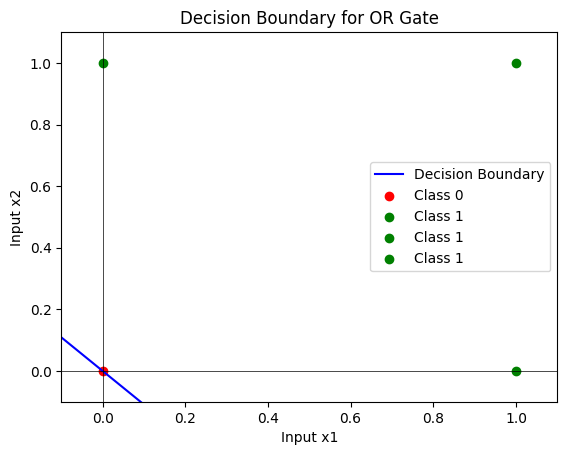

In [11]:
x1_values = np.linspace(-0.1, 1.1, 100)  # Range for x1 (extend slightly for better visibility)
# Calculate corresponding x2 values for the decision boundary
x2_values = -(weight_OR[0] * x1_values + bias_OR) / weight_OR[1]

# Plot the decision boundary line
plt.plot(x1_values, x2_values, label="Decision Boundary", color="blue")

# Plot the input points and color them based on the target values
for input_point, target in zip(inputs_OR, targets_OR):
    if target == 0:
        plt.scatter(input_point[0], input_point[1], color='red', label='Class 0' if target == 0 else '')
    else:
        plt.scatter(input_point[0], input_point[1], color='green', label='Class 1' if target == 1 else '')
# Set plot limits and labels
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Input x1')
plt.ylabel('Input x2')

# Show plot with legends
plt.legend()
plt.title('Decision Boundary for OR Gate')
# plt.grid(True)
plt.show()

### For AND-NOT Gate

In [21]:
bias_AND_NOT = 0
threshold_AND_NOT = 1
learning_rate_AND_NOT = 0.5
epochs_AND_NOT = 10

inputs_AND_NOT= [(0,0), (0,1), (1,0), (1,1)]
weight_AND_NOT = np.array([-0.63 , -0.43])
targets_AND_NOT = [0,0,1,0]

print(f"\nFor NAND GATE with Random Weights {weight_AND_NOT}")
perform_Operation(weight_AND_NOT, bias_AND_NOT, inputs_AND_NOT, targets_AND_NOT, threshold_AND_NOT, learning_rate_AND_NOT, epochs_AND_NOT)

print(f"\nFor NAND GATE with Optimal Weights {weight_AND_NOT}")
perform_Operation(weight_AND_NOT, bias_AND_NOT, inputs_AND_NOT, targets_AND_NOT, threshold_AND_NOT, learning_rate_AND_NOT, epochs_AND_NOT)


For NAND GATE with Random Weights [-0.63 -0.43]
*************************************-----------------------------------------------------------------*************************************


For Epoch 1
Got:0,Expected:0
Got:0,Expected:0
Got:0,Expected:1
Calculating New weights, where learning_rate: 0.5, old_weights: -0.63, difference: 0, got_output: 0, expected_output: 0
Calculating New weights, where learning_rate: 0.5, old_weights: -0.43, difference: 0, got_output: 0, expected_output: 0
New Weights: [-0.13 -0.43]


For Epoch 2
Got:0,Expected:0
Got:0,Expected:0
Got:0,Expected:1
Calculating New weights, where learning_rate: 0.5, old_weights: -0.13, difference: 0, got_output: 0, expected_output: 0
Calculating New weights, where learning_rate: 0.5, old_weights: -0.43, difference: 0, got_output: 0, expected_output: 0
New Weights: [ 0.37 -0.43]


For Epoch 3
Got:0,Expected:0
Got:0,Expected:0
Got:0,Expected:1
Calculating New weights, where learning_rate: 0.5, old_weights: 0.37, difference: 

### Questions
#### Q. What is the perceptron's weight configuration after training for the AND-NOT gate?
weights are: [1.37 -0.43]
#### Q. How does the perceptron handle cases where both inputs are 1 or 0?
It returns a 0 when both inputs are 1 or 0.

### NOT Gate

In [13]:
threshold_NOT = 1
learning_rate_NOT = 0.5
epochs_NOT = 10
bias_NOT = 1

inputs_NOT = [(1,),(0,)]
weight_NOT = np.array([-1])
targets_NOT = [0, 1]


print(f"\nFor NOT GATE with Random Weights {weight_NOT}")
perform_Operation(weight_NOT, bias_NOT, inputs_NOT, targets_NOT, threshold_NOT, learning_rate_NOT, epochs_NOT)

print(f"\nFor NOT GATE with Optimal Weights {weight_NOT}")
perform_Operation(weight_NOT, bias_NOT, inputs_NOT, targets_NOT, threshold_NOT, learning_rate_NOT, epochs_NOT)


For NOT GATE with Random Weights [-1]


For Epoch 1
Got:0,Expected:0
Got:1,Expected:1

Result weights [-1], was obtained in 1 epochs

For NOT GATE with Optimal Weights [-1]


For Epoch 1
Got:0,Expected:0
Got:1,Expected:1

Result weights [-1], was obtained in 1 epochs


### XOR Gate

In [14]:
def XOR_logicFunction(x, targets_AND, targets_OR, targets_AND_NOT):
    y1 = Perceptron(weight_AND, x, targets_AND, bias_AND)[1]
    y2 = Perceptron(weight_OR, x, targets_OR, bias_OR)[1]
    y3 = Perceptron(weight_AND_NOT, [y2, y1], targets_AND_NOT, bias_AND_NOT)[1]
    return y3

test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("XOR({}, {}) = {}\n".format(0, 1, XOR_logicFunction(test1, [0],[1],[0])))
print("XOR({}, {}) = {}\n".format(1, 1, XOR_logicFunction(test2, [1],[1],[1])))
print("XOR({}, {}) = {}\n".format(0, 0, XOR_logicFunction(test3, [0],[0],[0])))
print("XOR({}, {}) = {}\n".format(1, 0, XOR_logicFunction(test4, [0],[1],[0])))

Got:0,Expected:[0]
Got:1,Expected:[1]
Got:1,Expected:[0]
XOR(0, 1) = 1

Got:1,Expected:[1]
Got:1,Expected:[1]
Got:0,Expected:[1]
XOR(1, 1) = 0

Got:0,Expected:[0]
Got:0,Expected:[0]
Got:0,Expected:[0]
XOR(0, 0) = 0

Got:0,Expected:[0]
Got:1,Expected:[1]
Got:1,Expected:[0]
XOR(1, 0) = 1



### Questions:
#### Q. Why does the Single Layer Perceptron struggle to classify the XOR gate?
Ans.:-
* It struggles since the XOR Gate is not linearly Seperable
* Single Layer Perceptron Limitation: An SLP can only create linear decision boundaries. It means it can only classify problems that are linearly separable.

* It computes the output as:
    Output=Activation(Weights⋅Input+Bias)

* The decision boundary is a straight line (or hyperplane in higher dimensions).

* XOR Gate Non-Linearity: The XOR gate requires a decision boundary that can curve or bend to separate the two classes, which a single line cannot achieve.


#### Q. What modifications can be made to the neural network model to handle the XOR gate correctly?
* We can Add a hidden Layer to the network with backward Propogation
* To classify the XOR gate correctly, we need a more complex model like a Multi-Layer Perceptron (MLP) with at least one hidden layer. An MLP can create non-linear decision boundaries by combining multiple linear boundaries through hidden layers, enabling it to solve non-linearly separable problems like XOR.